In [86]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn. linear_model import LogisticRegression, LinearRegression

In [67]:
dataset=pd.read_csv("Dataset_CreditScoring.csv")

In [68]:
dataset.shape

(3000, 30)

In [69]:
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,582.0,3.0,3.0,0.0,4.0,0.0,5.0,117.0,27.0,...,3.0,92.00%,21.00%,2.0,3.0,7.0,21.00%,4.0,4.0,0.00%
1,1.0,662.0,15.0,9.0,0.0,3.0,1.0,3.0,14.0,14.0,...,1.0,80.00%,0.00%,0.0,0.0,0.0,100.00%,12.0,0.0,100.00%
2,1.0,805.0,0.0,0.0,0.0,1.0,5.0,1.0,354.0,7.0,...,5.0,36.00%,65.00%,0.0,1.0,1.0,73.00%,1.0,1.0,53.00%
3,1.0,1175.0,8.0,5.0,0.0,6.0,1.0,10.0,16.0,4.0,...,3.0,91.00%,25.00%,1.0,1.0,1.0,75.00%,7.0,1.0,133.00%
4,1.0,1373.0,3.0,1.0,0.0,9.0,0.0,8.0,130.0,52.0,...,1.0,125.00%,0.00%,0.0,1.0,4.0,14.00%,3.0,1.0,0.00%


In [70]:
dataset=dataset.drop('ID', axis=1)

In [71]:
dataset.dtypes

TARGET             float64
DerogCnt           float64
CollectCnt         float64
BanruptcyInd       float64
InqCnt06           float64
InqTimeLast        float64
InqFinanceCnt24    float64
TLTimeFirst        float64
TLTimeLast         float64
TLCnt03            float64
TLCnt12            float64
TLCnt24            float64
TLCnt              float64
TLSum               object
TLMaxSum            object
TLSatCnt           float64
TLDel60Cnt         float64
TLBadCnt24         float64
TL75UtilCnt        float64
TL50UtilCnt        float64
TLBalHCPct          object
TLSatPct            object
TLDel3060Cnt24     float64
TLDel90Cnt24       float64
TLDel60CntAll      float64
TLOpenPct           object
TLBadDerogCnt      float64
TLDel60Cnt24       float64
TLOpen24Pct         object
dtype: object

In [72]:
dataset=dataset.drop('TLSum', axis=1)
dataset=dataset.drop('TLMaxSum', axis=1)
dataset=dataset.drop('TLBalHCPct', axis=1)
dataset=dataset.drop('TLSatPct', axis=1)
dataset=dataset.drop('TLOpenPct', axis=1)
dataset=dataset.drop('TLOpen24Pct', axis=1)
dataset.shape

(3000, 23)

In [73]:
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLBadDerogCnt        0
TLDel60Cnt24         0
dtype: int64

In [74]:
dataset=dataset.fillna(dataset.mean())

In [75]:
dataset.shape

(3000, 23)

In [76]:
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLBadDerogCnt      0
TLDel60Cnt24       0
dtype: int64

In [81]:
y=dataset.iloc[:,0].values
x=dataset.iloc[:,1:23].values

In [82]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [83]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
classifier=LogisticRegression() 
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [96]:
print(confusion_matrix(y_test,y_pred))

[[485  13]
 [ 86  16]]


In [98]:
print(accuracy_score(y_test, y_pred))

0.835


In [99]:
prediction=classifier.predict_proba(x_test)
prediction

array([[0.02711779, 0.97288221],
       [0.93957015, 0.06042985],
       [0.84721679, 0.15278321],
       ...,
       [0.88603776, 0.11396224],
       [0.46226015, 0.53773985],
       [0.91553581, 0.08446419]])

In [104]:
df_prediction_prob = pd.DataFrame(prediction, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['predicted_TARGET' ])
df_test_dataset = pd.DataFrame(y_test, columns= ['Actual Outcome'])
dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.to_csv("output.csv")
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1.0,0.027118,0.972882,1.0
1,0.0,0.939570,0.060430,0.0
2,0.0,0.847217,0.152783,0.0
3,0.0,0.885418,0.114582,0.0
4,0.0,0.818542,0.181458,0.0


In [111]:
dfx.sort_values(by="prob_0", ascending=False)

,Actual Outcome,prob_0,prob_1,predicted_TARGET
92,0.0,0.994496,0.005504,0.0
151,0.0,0.988897,0.011103,0.0
539,0.0,0.988279,0.011721,0.0
423,0.0,0.986742,0.013258,0.0
503,0.0,0.986533,0.013467,0.0
...,...,...,...,...
554,1.0,0.171306,0.828694,1.0
69,0.0,0.171252,0.828748,1.0
454,0.0,0.064027,0.935973,1.0
0,1.0,0.027118,0.972882,1.0


In [112]:
dfx['Decile'] = pd.qcut(dfx['prob_0'], 10, labels=False)

In [113]:
dfx

,Actual Outcome,prob_0,prob_1,predicted_TARGET,Decile
0,1.0,0.027118,0.972882,1.0,0
1,0.0,0.939570,0.060430,0.0,7
2,0.0,0.847217,0.152783,0.0,3
3,0.0,0.885418,0.114582,0.0,4
4,0.0,0.818542,0.181458,0.0,2
...,...,...,...,...,...
595,0.0,0.964218,0.035782,0.0,9
596,0.0,0.976720,0.023280,0.0,9
597,0.0,0.886038,0.113962,0.0,4
598,1.0,0.462260,0.537740,1.0,0


In [114]:
dfx.sort_values(by="prob_0", ascending=False)

,Actual Outcome,prob_0,prob_1,predicted_TARGET,Decile
92,0.0,0.994496,0.005504,0.0,9
151,0.0,0.988897,0.011103,0.0,9
539,0.0,0.988279,0.011721,0.0,9
423,0.0,0.986742,0.013258,0.0,9
503,0.0,0.986533,0.013467,0.0,9
...,...,...,...,...,...
554,1.0,0.171306,0.828694,1.0,0
69,0.0,0.171252,0.828748,1.0,0
454,0.0,0.064027,0.935973,1.0,0
0,1.0,0.027118,0.972882,1.0,0


In [117]:
dfx["Decile"]

0      0
1      7
2      3
3      4
4      2
      ..
595    9
596    9
597    4
598    0
599    6
Name: Decile, Length: 600, dtype: int64

In [138]:
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

In [139]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(600, 1)

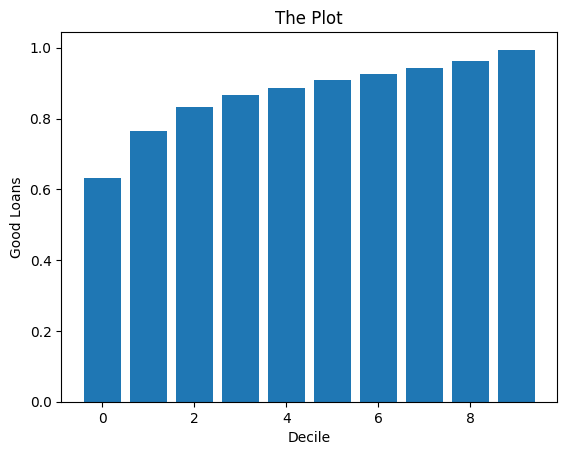

In [148]:
import matplotlib.pyplot as plt

plt.bar(dfx['Decile'], dfx['prob_0'])
plt.xlabel('Decile')
plt.ylabel('Good Loans')
plt.title('The Plot')
plt.show()

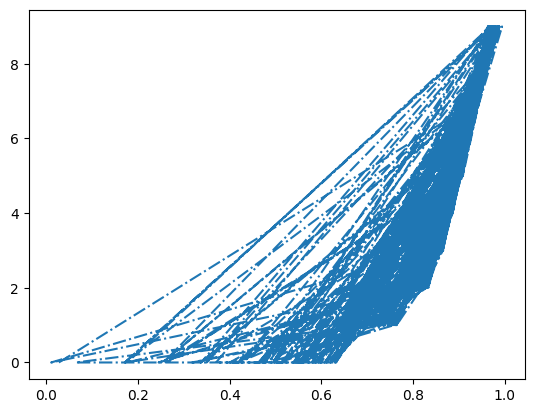

In [152]:
plt.plot(dfx['prob_0'], dfx['Decile'],'-.')
plt.show()